<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/Video_Games_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files 

uploaded = files.upload()

import io

data = pd.read_csv(io.BytesIO(uploaded['Video_Games_Sales.csv']))

Saving Video_Games_Sales.csv to Video_Games_Sales.csv


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Context
Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900

## Content
Alongside the fields: Name, Platform, YearofRelease, Genre, Publisher, NASales, EUSales, JPSales, OtherSales, Global_Sales, we have:-

- Critic_score - Aggregate score compiled by Metacritic staff
- Criticcount - The number of critics used in coming up with the Criticscore
- User_score - Score by Metacritic's subscribers
- Usercount - Number of users who gave the userscore
- Developer - Party responsible for creating the game
- Rating - The ESRB ratings
- Acknowledgements
This repository, https://github.com/wtamu-cisresearch/scraper, after a few adjustments worked extremely well!

## Inspiration
It would be interesting to see any machine learning techniques or continued data visualizations applied on this data set.

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# lets check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
# let's check the missing values 
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
# let's perform Univariate Analysis 




### UNIVARIATE 
- Numerical


In [9]:
num_cols = ['Year_of_Release', 
            "NA_Sales",
            "EU_Sales",         
            "JP_Sales",         
            "Other_Sales",     
            "Global_Sales",     
            "Critic_Score",     
            "Critic_Count",
            "User_Count"
    ]

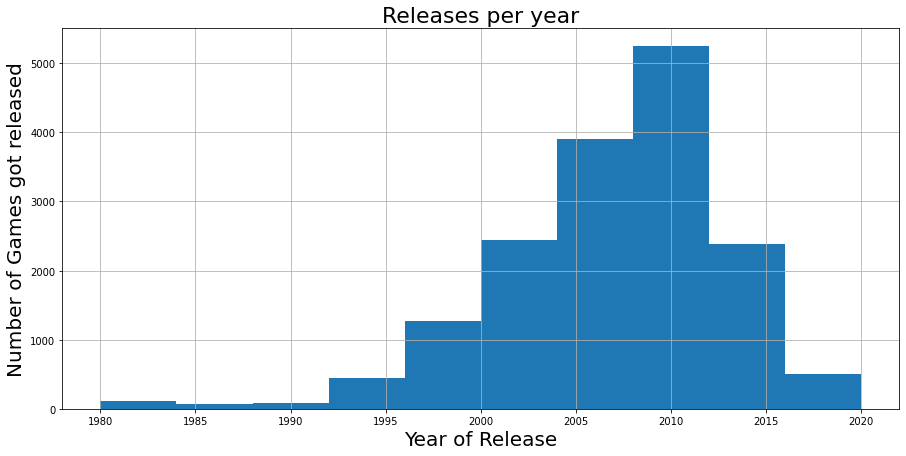

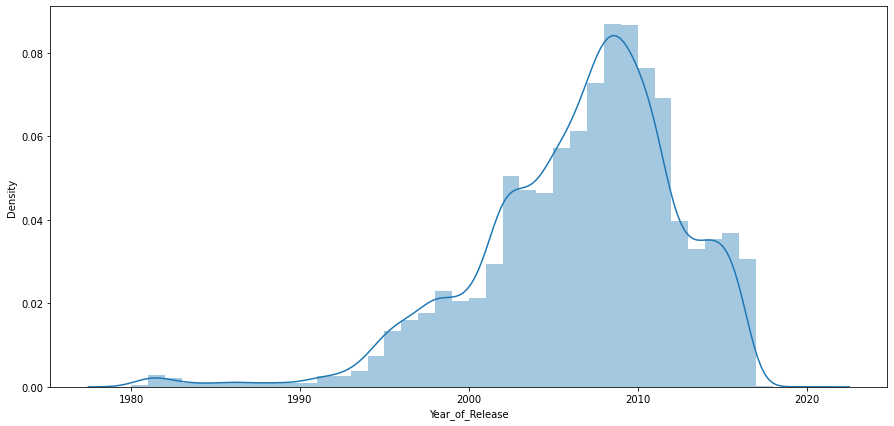

In [10]:
# let's explore the column Year_of_Release 
plt.figure(figsize=(15,7))
data['Year_of_Release'].hist()
plt.ylabel('Number of Games got released', size=20)
plt.xlabel('Year of Release', size=20)
plt.title('Releases per year', size=22)
plt.show()


# with KDE 
plt.figure(figsize=(15,7))

sns.distplot(data.Year_of_Release.dropna(), kde=True, bins=40)
plt.show()

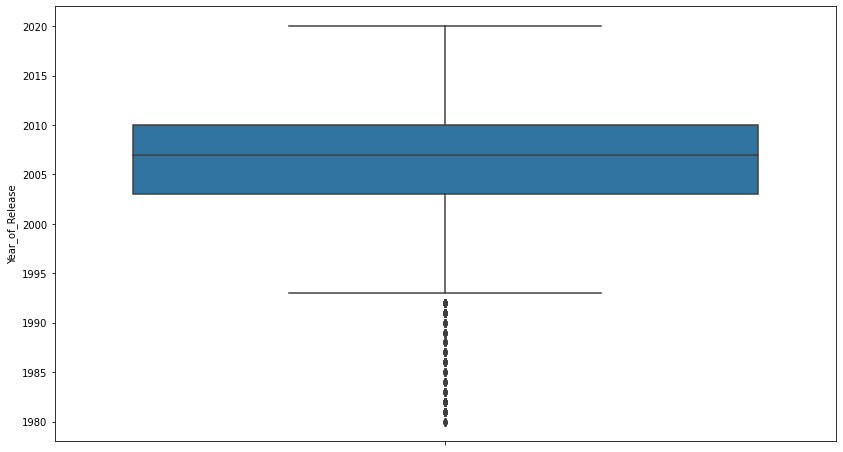

In [11]:
plt.figure(figsize=(14,8))

sns.boxplot(y=data["Year_of_Release"])
plt.show()

- Here you can see there are few outliers which are in after year 1990 
- from above histogram is also visible that year 1990 to 1980 lies far from the Sampled data

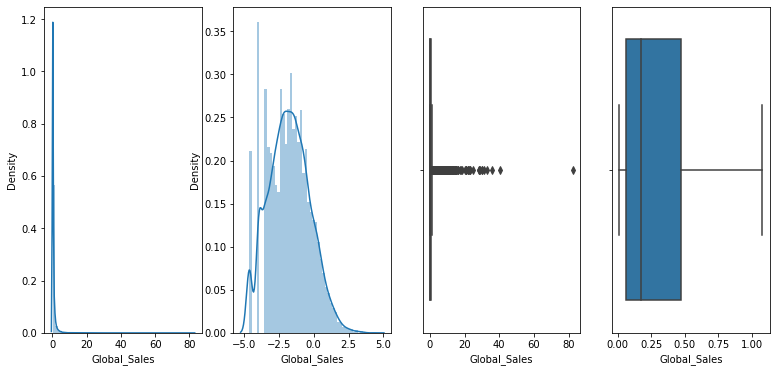

In [12]:
global_sales = data['Global_Sales']
fig, ax = plt.subplots(1, 4, figsize=(13, 6))
sns.distplot(global_sales.dropna(), kde=True, ax=ax[0])
sns.distplot(np.log(global_sales.dropna()), kde=True, ax=ax[1])

sns.boxplot(global_sales.dropna(), ax=ax[2])
sns.boxplot(global_sales.dropna(), ax=ax[3], showfliers=False)
plt.show()

In [13]:
#####
##
#
#

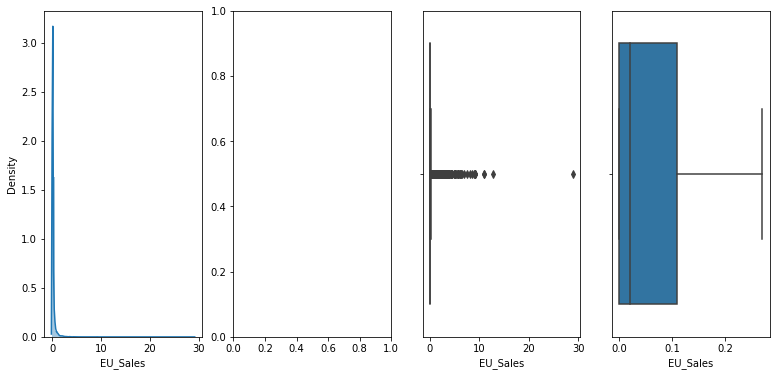

In [14]:
_sales = data['EU_Sales']
s =np.log(_sales.dropna())

fig, ax = plt.subplots(1, 4, figsize=(13, 6))
sns.distplot(_sales.dropna(), kde=True, ax=ax[0])
#sns.distplot(s.dropna(), kde=True, ax=ax[1])

sns.boxplot(_sales.dropna(), ax=ax[2])
sns.boxplot( _sales.dropna(), ax=ax[3], showfliers=False)
plt.show()

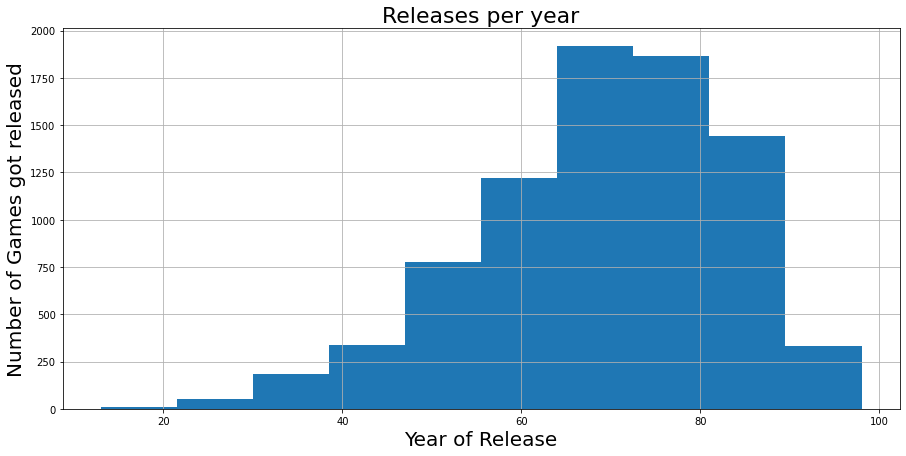

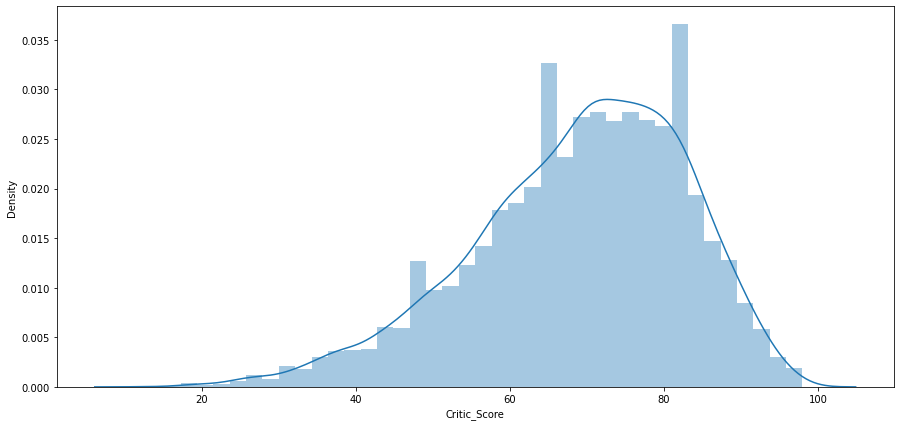

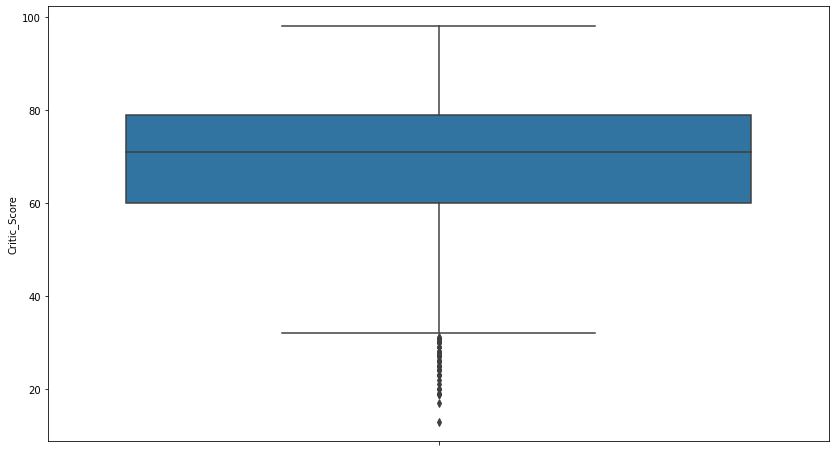

In [15]:
# let's explore the column Year_of_Release 
plt.figure(figsize=(15,7))
data['Critic_Score'].dropna().hist()
plt.ylabel('Number of Games got released', size=20)
plt.xlabel('Year of Release', size=20)
plt.title('Releases per year', size=22)
plt.show()


# with KDE 
plt.figure(figsize=(15,7))

sns.distplot(data.Critic_Score.dropna(), kde=True, bins=40)
plt.show()


plt.figure(figsize=(14,8))

sns.boxplot(y=data["Critic_Score"])
plt.show()

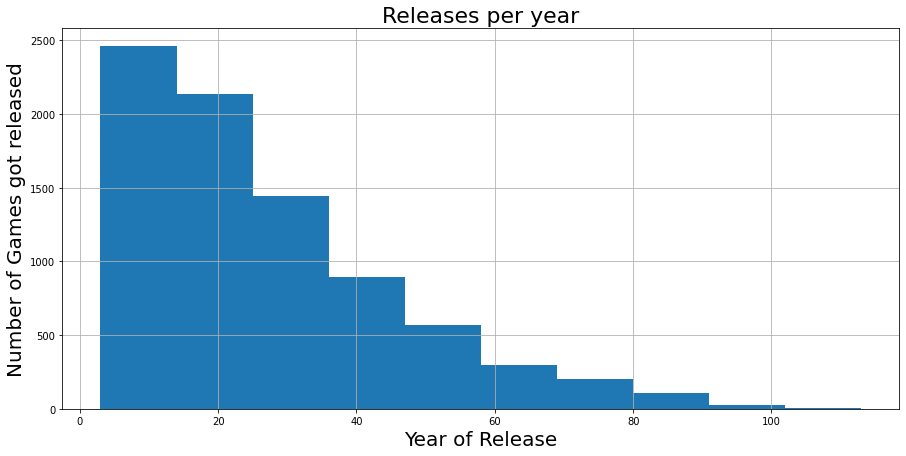

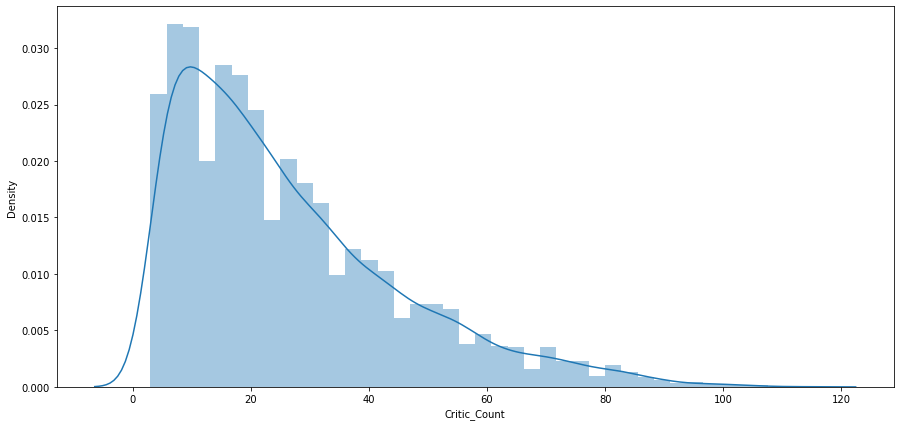

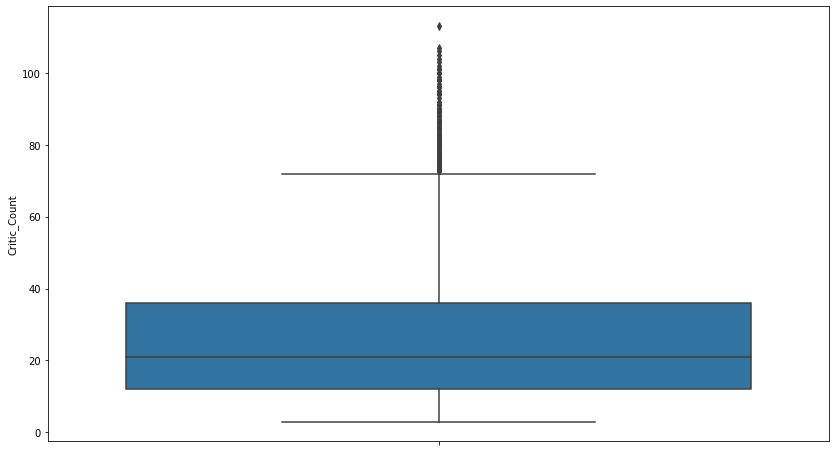

In [16]:
# let's explore the column Year_of_Release 
plt.figure(figsize=(15,7))
data['Critic_Count'].dropna().hist()
plt.ylabel('Number of Games got released', size=20)
plt.xlabel('Year of Release', size=20)
plt.title('Releases per year', size=22)
plt.show()


# with KDE 
plt.figure(figsize=(15,7))

sns.distplot(data.Critic_Count.dropna(), kde=True, bins=40)
plt.show()


plt.figure(figsize=(14,8))

sns.boxplot(y=data["Critic_Count"].dropna())
plt.show()

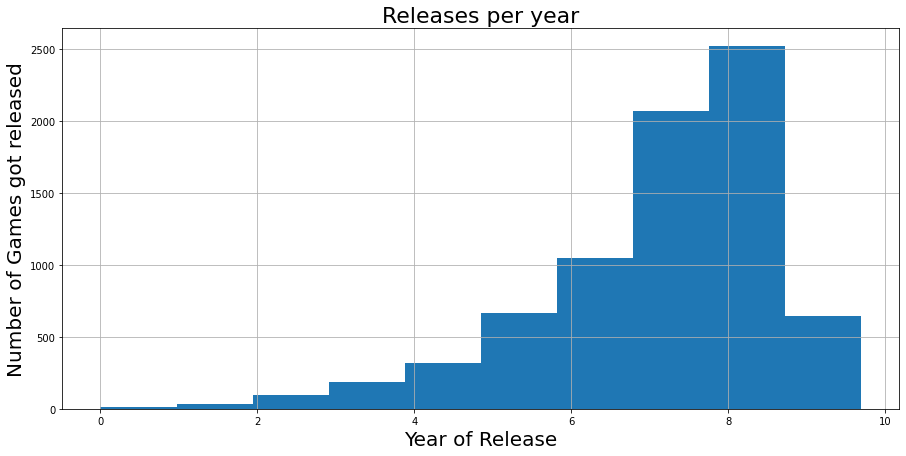

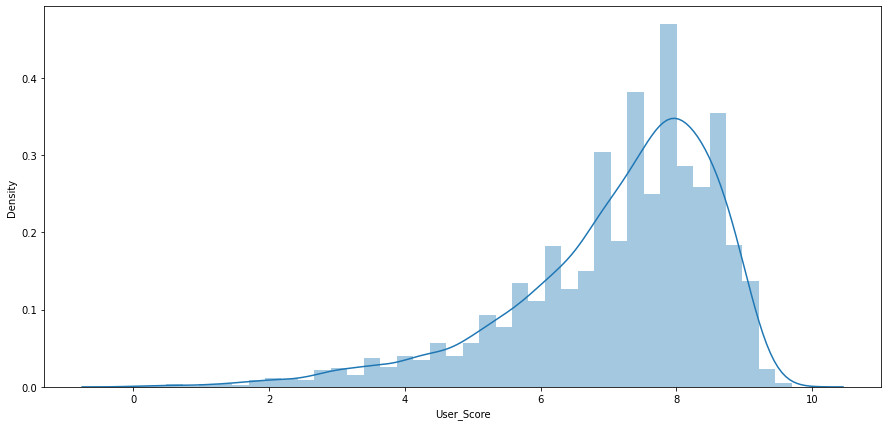

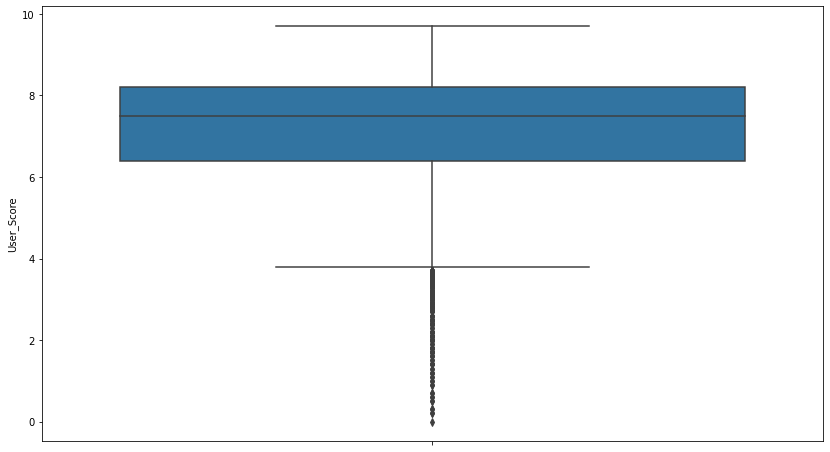

In [17]:
# User_Score
data.User_Score=pd.to_numeric(data.User_Score, errors='coerce')
plt.figure(figsize=(15,7))
data['User_Score'].dropna().hist()
plt.ylabel('Number of Games got released', size=20)
plt.xlabel('Year of Release', size=20)
plt.title('Releases per year', size=22)
plt.show()


# with KDE 
plt.figure(figsize=(15,7))

sns.distplot(data.User_Score.dropna(), kde=True, bins=40)
plt.show()


plt.figure(figsize=(14,8))

sns.boxplot(y=data["User_Score"].dropna())
plt.show()

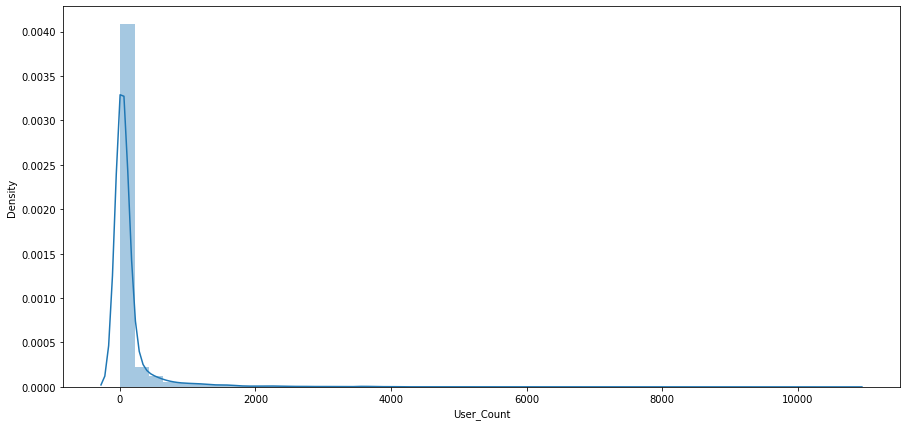

In [18]:
# USER COUNT 
plt.figure(figsize=(15, 7))
sns.distplot(data.User_Count.dropna(), kde=True)
plt.show()

## Univariate Data Analysis Of **Categorical Data**

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [20]:
cat_col = ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']


RATING Exploration

In [22]:
# Let's explore the Rating 
data['Rating'][:5]

0      E
1    NaN
2      E
3      E
4    NaN
Name: Rating, dtype: object

In [30]:
print('Rating non-graphical exploration')
print(data['Rating'].value_counts(), '\n')
print('Missing values ',data['Rating'].isnull().sum())


Rating non-graphical exploration
E       3991
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64 

Missing values  6769


Text(0, 0.5, 'Count')

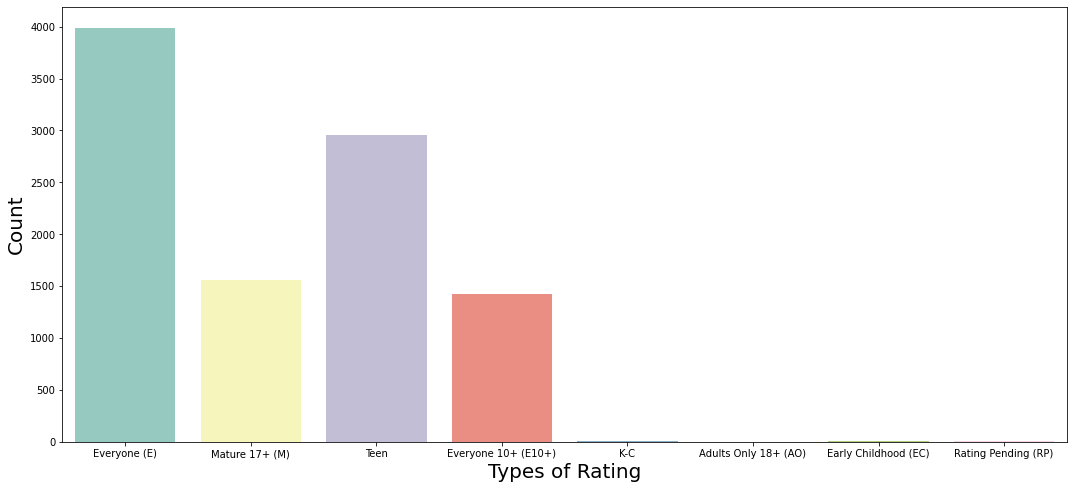

In [46]:
plt.figure(figsize=(18, 8))
sns.countplot(data['Rating'], palette="Set3")
plt.xlabel('Types of Rating', size=20)
plt.xticks(np.arange(8), ['Everyone (E)', 'Mature 17+ (M)', 'Teen', 'Everyone 10+ (E10+)', 'K-C', 'Adults Only 18+ (AO)', 'Early Childhood (EC)', 'Rating Pending (RP)'])
plt.ylabel('Count', size=20)

#### Genre Exploration

Genre non-graphical exploration
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64 

Missing values  2


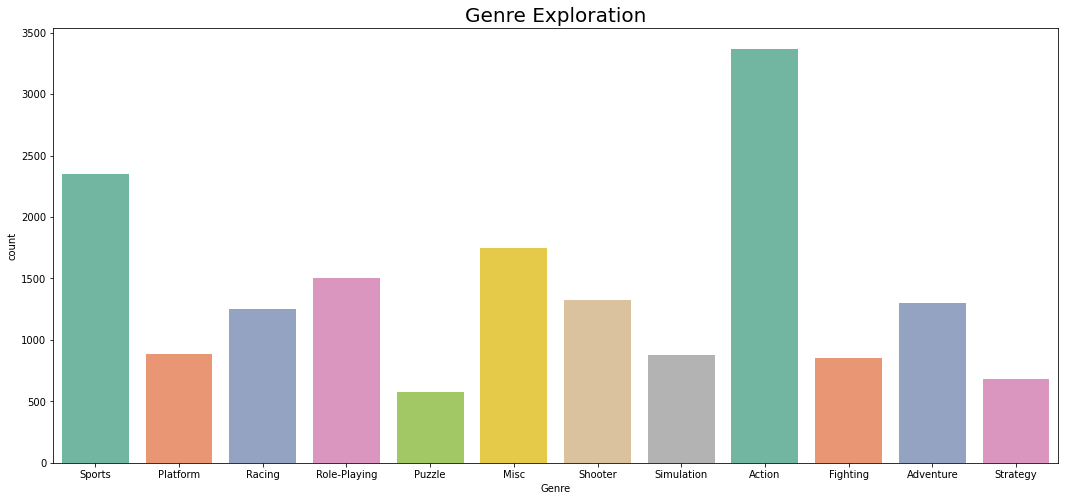

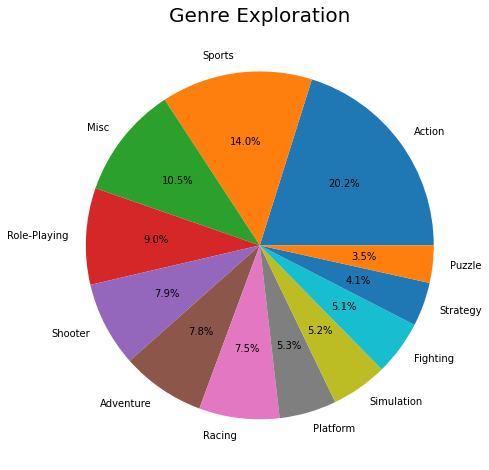

In [63]:
print('Genre non-graphical exploration')
print(data['Genre'].value_counts(), '\n')
print('Missing values ',data['Genre'].isnull().sum())

plt.figure(figsize=(18, 8))
sns.countplot(data['Genre'], palette='Set2')
plt.title('Genre Exploration', size=20) 
plt.show()

plt.figure(figsize=(18, 8))
plt.pie(data['Genre'].value_counts(),
        labels=data.Genre.value_counts().index, autopct="%.1f%%")
plt.title('Genre Exploration', size=20) 
plt.show()

### Publisher

Publisher non-graphical exploration
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
TalonSoft                          1
Hearty Robin                       1
Riverhillsoft                      1
Interworks Unlimited, Inc.         1
Havas Interactive                  1
Name: Publisher, Length: 581, dtype: int64 

Missing values  54


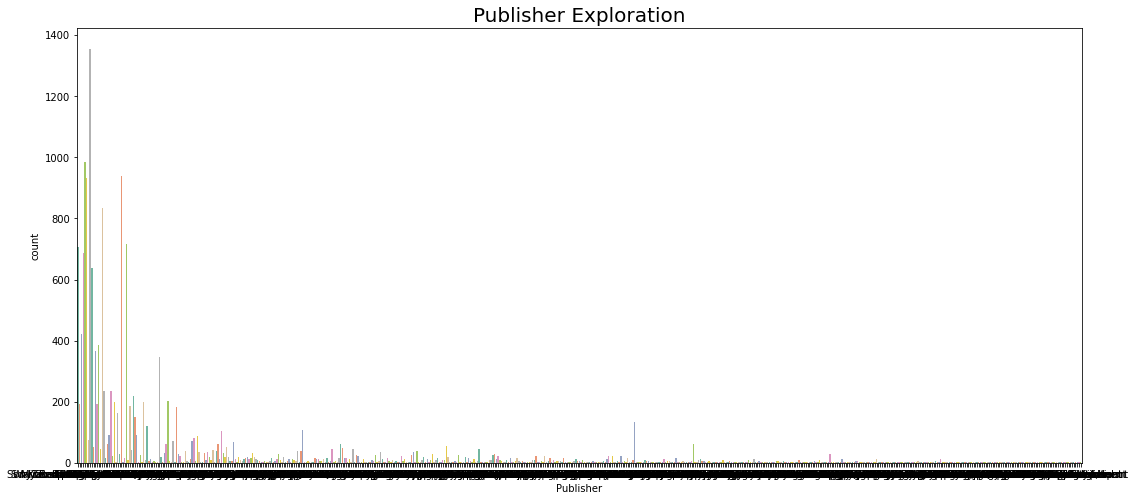

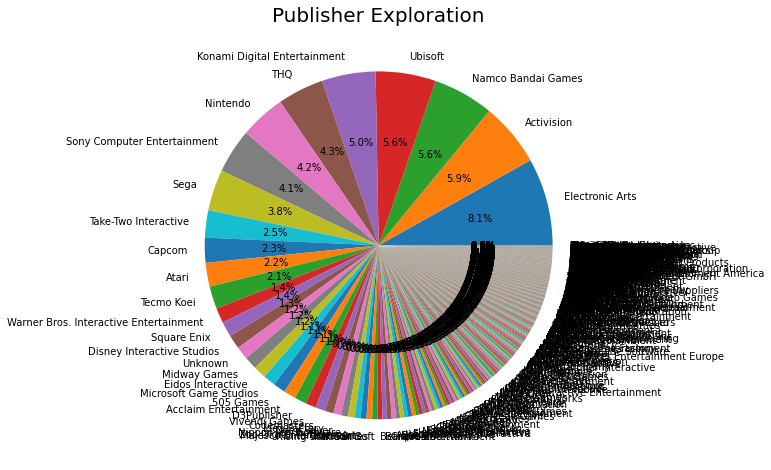

In [64]:
print('Publisher non-graphical exploration')
print(data['Publisher'].value_counts(), '\n')
print('Missing values ',data['Publisher'].isnull().sum())



plt.figure(figsize=(18, 8))
sns.countplot(data['Publisher'], palette='Set2')
plt.title('Publisher Exploration', size=20) 
plt.show()

plt.figure(figsize=(18, 8))
plt.pie(data['Publisher'].value_counts(),
        labels=data.Publisher.value_counts().index, autopct="%.1f%%")
plt.title('Publisher Exploration', size=20) 
plt.show()

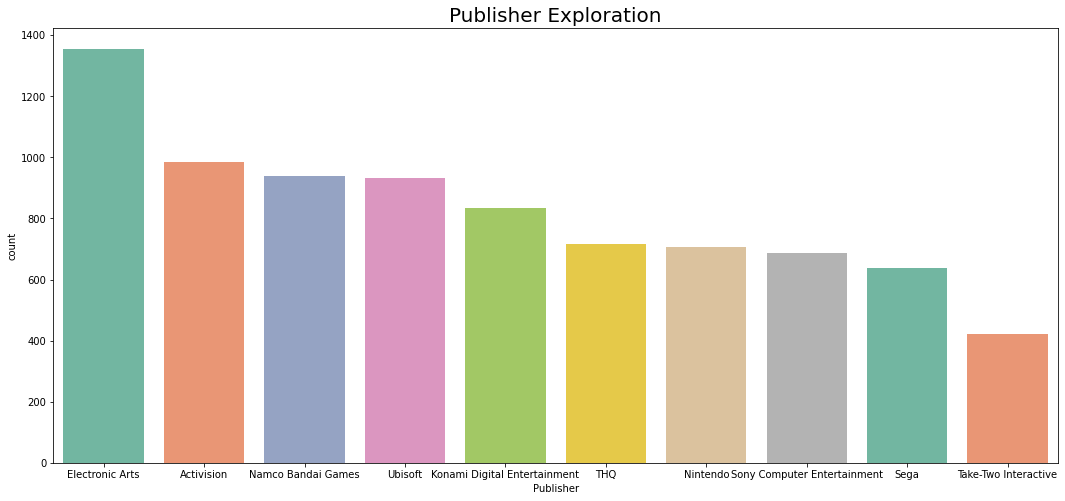

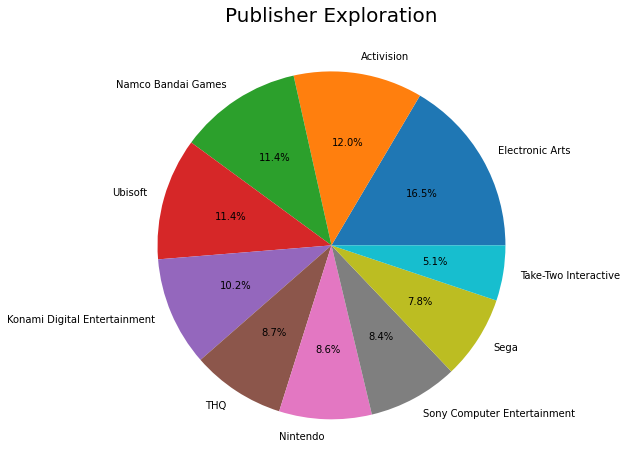

In [65]:
plt.figure(figsize=(18, 8))
sns.countplot(data['Publisher'],order=data.Publisher.value_counts().index[:10], palette='Set2')
plt.title('Publisher Exploration', size=20) 
plt.show()

plt.figure(figsize=(18, 8))
plt.pie(data['Publisher'].value_counts()[:10],
        labels=data.Publisher.value_counts().index[:10], autopct="%.1f%%")
plt.title('Publisher Exploration', size=20) 
plt.show()

Developer non-graphical exploration
Ubisoft                                    204
EA Sports                                  172
EA Canada                                  167
Konami                                     162
Capcom                                     139
                                          ... 
Rocksteady Studios, Iron Galaxy Studios      1
The Tangentlemen                             1
Media Molecule, United Front Games           1
Amaze Entertainment, Walt Disney Japan       1
Square Enix, h.a.n.d. Inc.                   1
Name: Developer, Length: 1696, dtype: int64 

Missing values  6623


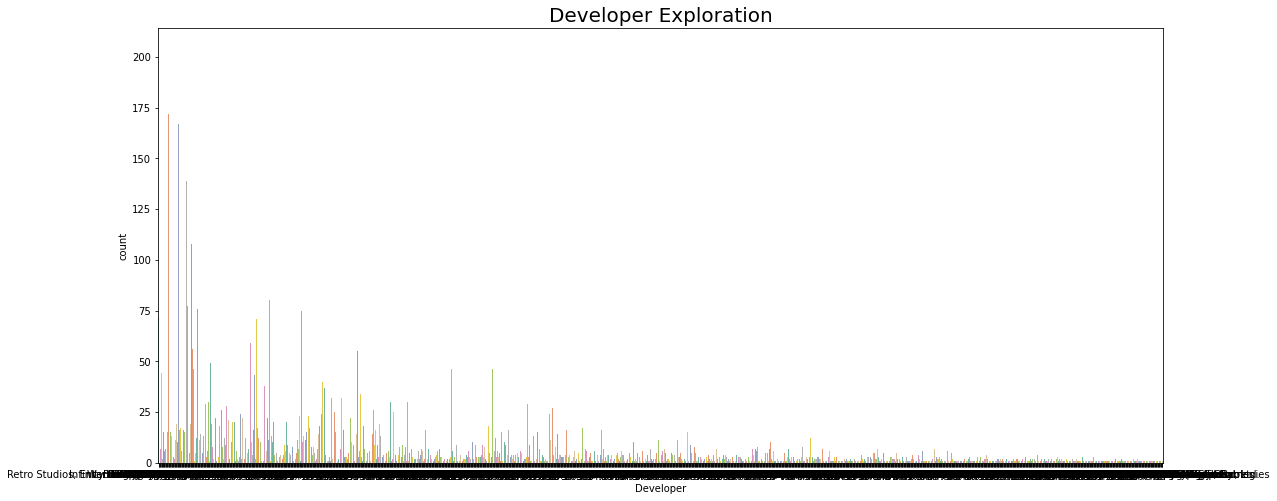

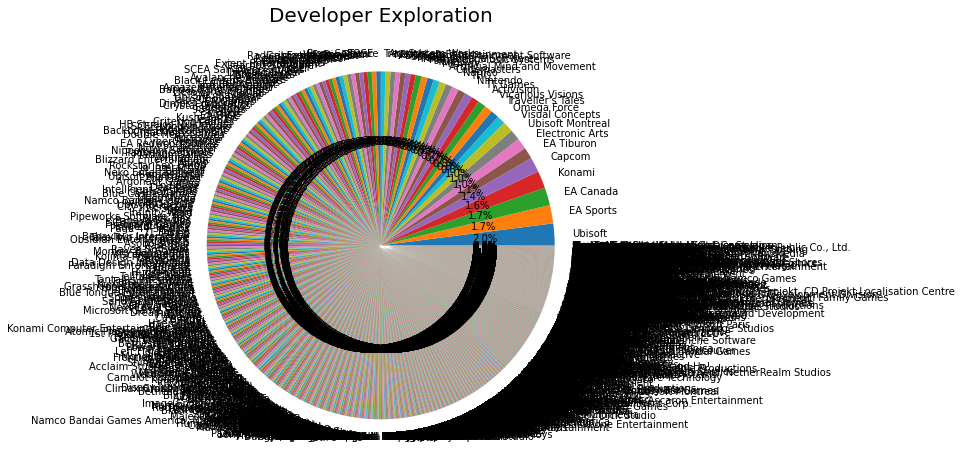

In [67]:
print('Developer non-graphical exploration')
print(data['Developer'].value_counts(), '\n')
print('Missing values ',data['Developer'].isnull().sum())



plt.figure(figsize=(18, 8))
sns.countplot(data['Developer'], palette='Set2')
plt.title('Developer Exploration', size=20) 
plt.show()

plt.figure(figsize=(18, 8))
plt.pie(data['Developer'].value_counts(),
        labels=data.Developer.value_counts().index, autopct="%.1f%%")
plt.title('Developer Exploration', size=20) 
plt.show()

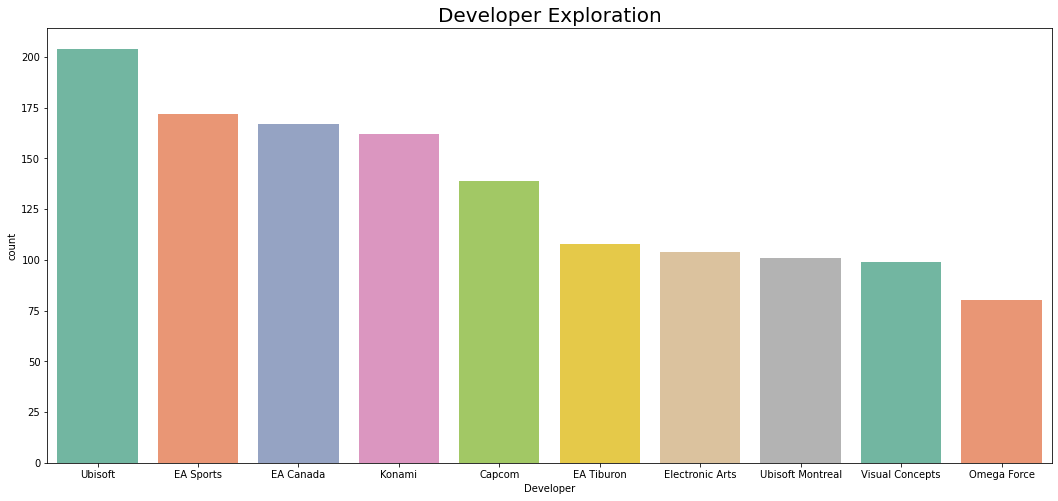

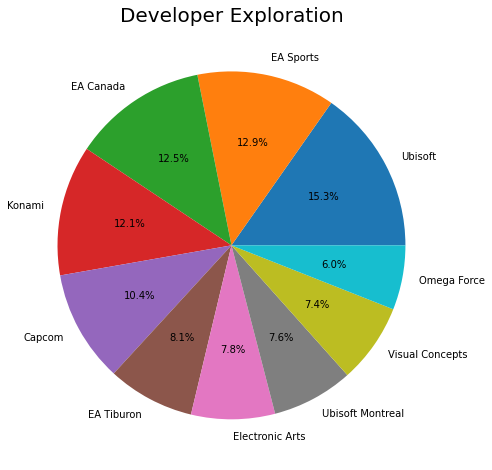

In [69]:
plt.figure(figsize=(18, 8))
sns.countplot(data['Developer'], order=data.Developer.value_counts().index[:10], palette='Set2')
plt.title('Developer Exploration', size=20) 
plt.show()

plt.figure(figsize=(18, 8))
plt.pie(data['Developer'].value_counts()[:10],
        labels=data.Developer.value_counts().index[:10], autopct="%.1f%%")
plt.title('Developer Exploration', size=20) 
plt.show()

Platform non-graphical exploration
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64 

Missing values  0


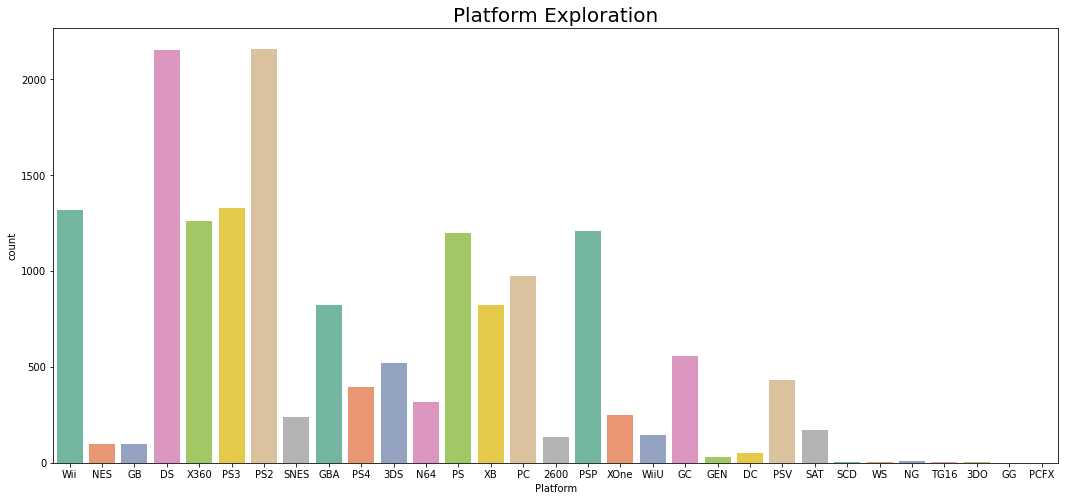

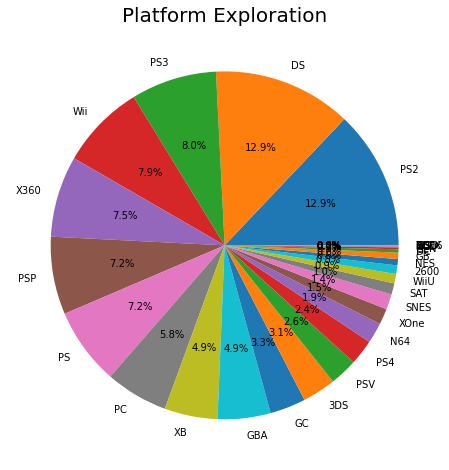

In [70]:
print('Platform non-graphical exploration')
print(data['Platform'].value_counts(), '\n')
print('Missing values ',data['Platform'].isnull().sum())



plt.figure(figsize=(18, 8))
sns.countplot(data['Platform'], palette='Set2')
plt.title('Platform Exploration', size=20) 
plt.show()

plt.figure(figsize=(18, 8))
plt.pie(data['Platform'].value_counts(),
        labels=data.Platform.value_counts().index, autopct="%.1f%%")
plt.title('Platform Exploration', size=20) 
plt.show()

-------------------------------- Here Ends Univariate Analysis-------------------------------

### Multi Variate Analysis 

- here my main objective is to find how sales performed with different parameter 
- which will help investors and others to look forward to 
- this Multi variate analysis will help to find how and which parameters affecting and how one should think to progress in future 

- Let's see how Sales will effects on other variables |


<Figure size 1800x1800 with 0 Axes>

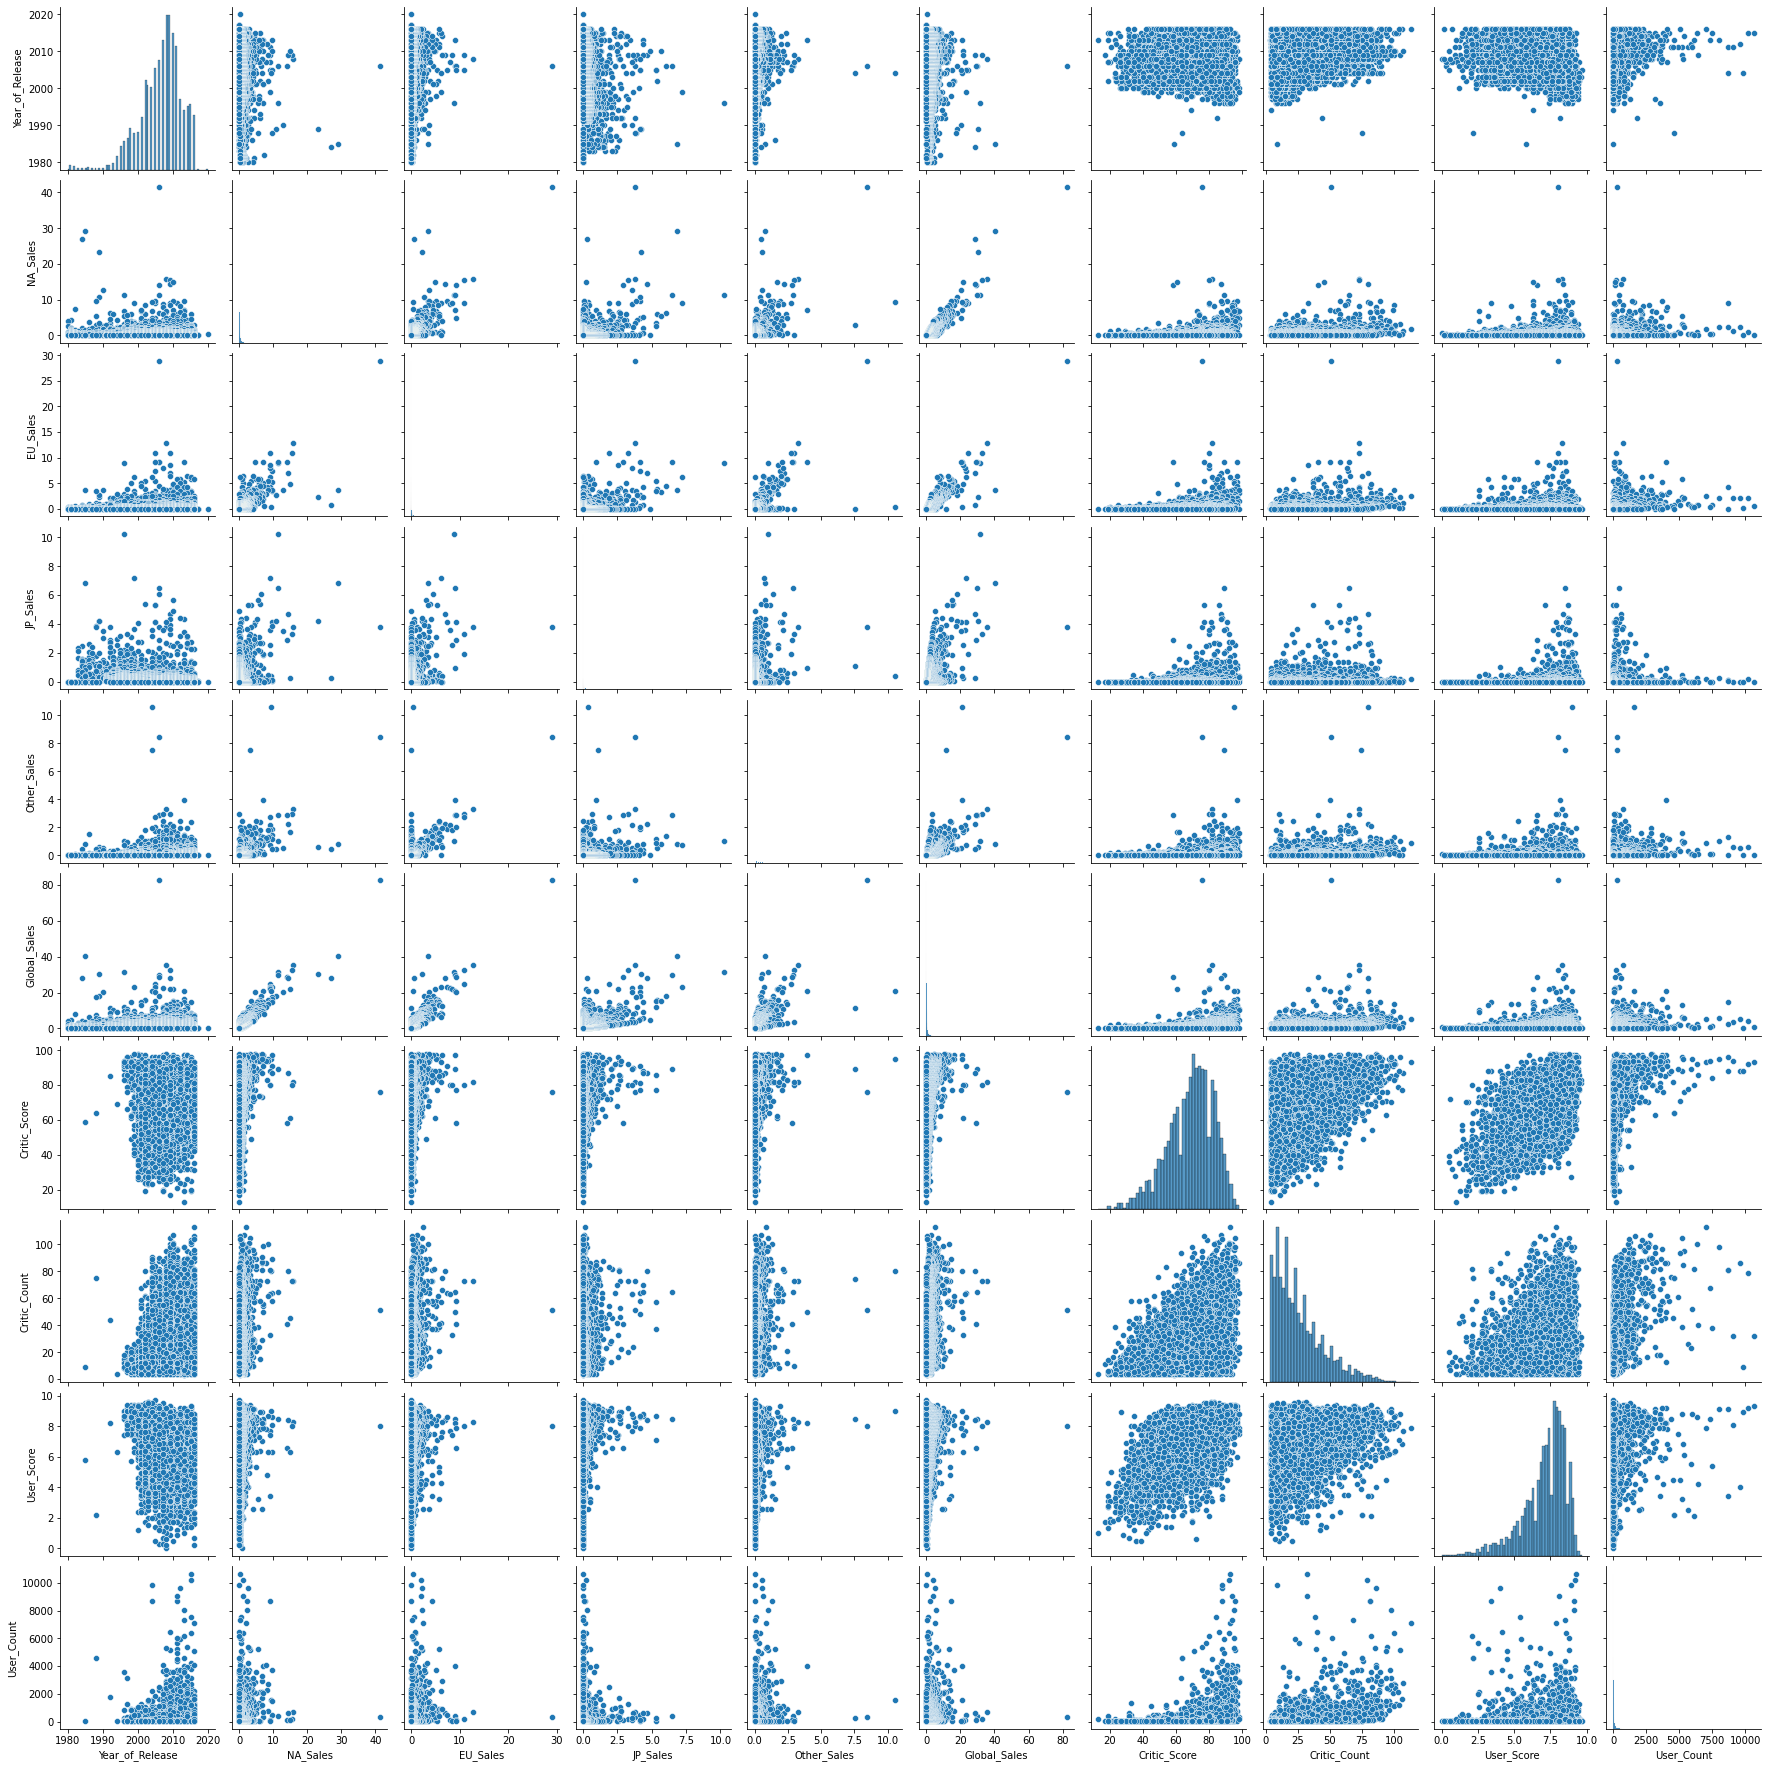

In [73]:
plt.figure(figsize=(25,25))
sns.pairplot(data)

plt.show()